In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
DF=pd.read_csv('Kyphosis.csv')

In [4]:
DF.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


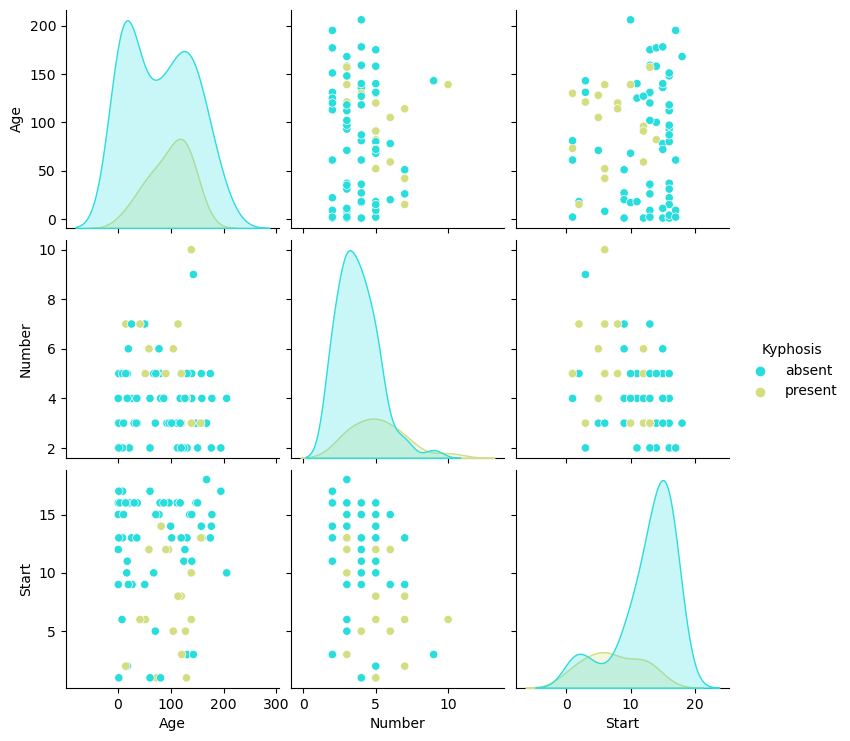

In [10]:
sns.pairplot(DF,hue='Kyphosis',palette='rainbow')

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(DF.drop('Kyphosis',axis=1),DF['Kyphosis'],test_size=0.3,random_state=101)

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

print(f'Confusion Matrix : \n{confusion_matrix(y_test,pred)}\n')
print(f'Classification Report : \n{classification_report(y_test,pred)}')

Confusion Matrix : 
[[12  5]
 [ 6  2]]

Classification Report : 
              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



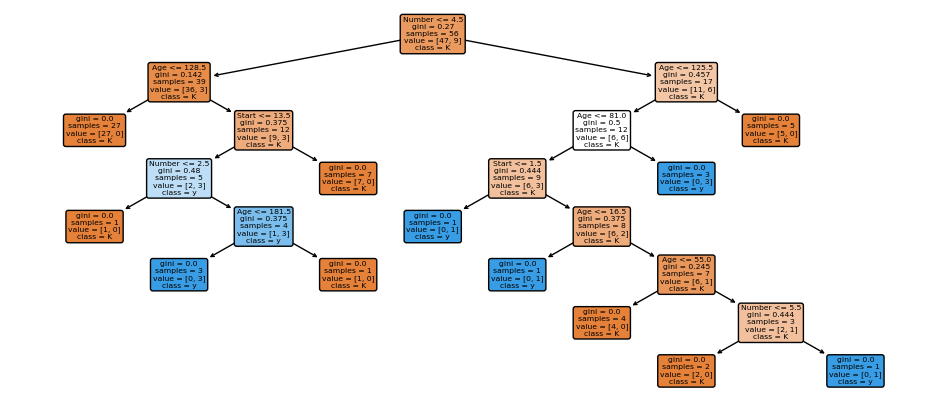

In [25]:
plt.figure(figsize=(12,5))
plot_tree(dtree,filled=True,feature_names=DF.columns[1:],class_names=DF.columns[0],rounded=True)
plt.show()

In [36]:
#Training the data with Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [37]:
print(f'Confusion Matrix : \n{confusion_matrix(y_test,rf_pred)}\n')
print(f'Classification Report : \n{classification_report(y_test,rf_pred)}')

Confusion Matrix : 
[[17  0]
 [ 6  2]]

Classification Report : 
              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

